## Animal Detection using Classification and Neural Networks

### DATASET
The Dataset is fom Kaggle, a data sciences website.
It is made for a competition to create system that recognise animals.
The Dataset can be dowloaded and use for free.

URL : https://www.kaggle.com/datasets/andrewmvd/animal-faces

### IMPORTING LIBRAIRIES

In [1]:
# Preprocessing
import numpy as np
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### DISPLAY IMAGES
To get an idea of what we use

In [6]:
# size of the picture
picture_size = 75 #the less pixelized we have
# relative path of the dataset downloaded locally
folder_path = "/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/"

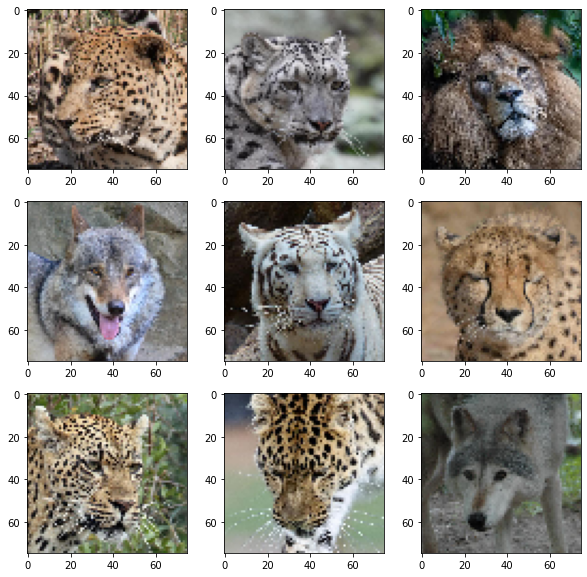

In [7]:
#to see the pictures in the corpus
animal = 'wild'

# to show the picture of the expression we're looking for
# size of the picture
plt.figure(figsize= (10,10))

for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    # to automatically find the set of pictures of the animals we want in the folder
    img = load_img(folder_path+"train/"+animal+"/"+
                  os.listdir(folder_path + "train/" + animal)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

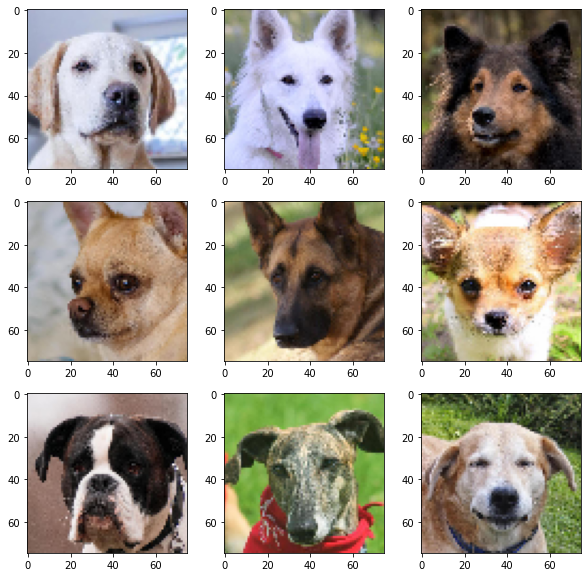

In [8]:
animal_2 = 'dog'

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+animal_2+"/"+
                  os.listdir(folder_path + "train/" + animal_2)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

### TRAINING DATA AND VALIDATION

In [11]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"val",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


### BUILDING MODEL

In [12]:
no_of_classes = 3

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

### FITTING THE MODEL WITH THE TRAINING AND VALIDATION DATA

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [15]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


InvalidArgumentError:  Input to reshape is a tensor with 1048576 values, but the requested shape requires a multiple of 4608
	 [[node sequential/flatten/Reshape (defined at <ipython-input-14-981791b505f2>:1) ]] [Op:__inference_train_function_2674]

Function call stack:
train_function


In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# path to images
path = '/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/train/'

# animal categories
categories = ['dog', 'wild', 'cat']

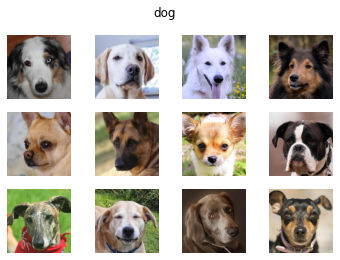

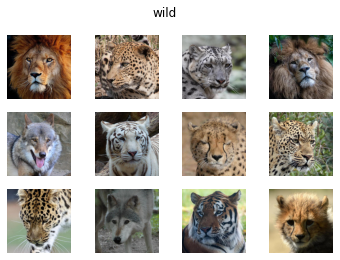

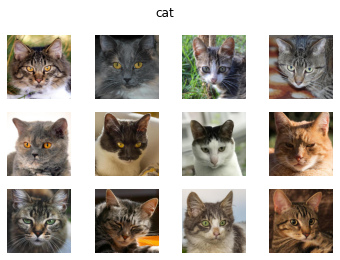

In [29]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [30]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

dog  => height min :  512 width min :  512
dog  => height max :  512 width max :  512
wild  => height min :  512 width min :  512
wild  => height max :  512 width max :  512
cat  => height min :  512 width min :  512
cat  => height max :  512 width max :  512


In [31]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/train/wild/flickr_wild_002512.jpg', 1], ['/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/train/cat/pixabay_cat_002980.jpg', 2], ['/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/train/cat/flickr_cat_000793.jpg', 2], ['/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/train/wild/flickr_wild_000078.jpg', 1], ['/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/train/cat/pixabay_cat_000329.jpg', 2], ['/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/train/dog/flickr_dog_000959.jpg', 0], ['/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/train/cat/pixabay_cat_000970.jpg', 2], ['/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/train/dog/pixabay_dog_000786.jpg', 0], ['/Users/charlotteportenseigne/Documents/Projects/Animal_Detector/animal/train/dog/pixabay_dog_002967.j

In [33]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

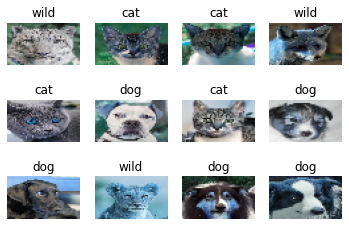

In [34]:
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [35]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [36]:
# Preprocess class labels
trainY = np_utils.to_categorical(trainY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(11704, 32, 55, 3)
(2926, 32, 55, 3)
(11704, 3)
(2926,)


In [62]:
# Deep learning
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

model = Sequential()

#1st CNN layer
model.add(Conv2D(32,(2,2),padding = 'same',input_shape = (48,48,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(32,(2,2),padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))


opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 32)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        4128      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
dense_10 (Dense)             (None, 12, 12, 128)     

In [63]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25


ValueError: in user code:

    /Users/charlotteportenseigne/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/charlotteportenseigne/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/charlotteportenseigne/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/charlotteportenseigne/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/charlotteportenseigne/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/charlotteportenseigne/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/charlotteportenseigne/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Users/charlotteportenseigne/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Users/charlotteportenseigne/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_10 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 32, 55, 3]


In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

code from : https://www.kaggle.com/code/etienne1976/animal-image-classification-with-keras/notebook